In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
data=pd.read_csv('/content/Crypto Data Since 2015.csv')
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [3]:

data['Bitcoin (USD)_diff']=data['Bitcoin (USD)']-data['Bitcoin (USD)'].shift(1)

result = seasonal_decompose(data['Bitcoin (USD)'], model='additive', period=12)
data['Bitcoin (USD)_sea_diff']=result.resid

data['Bitcoin (USD)_log'] = np.log(data['Bitcoin (USD)'])
data['Bitcoin (USD)_log_diff']=data['Bitcoin (USD)_log']-data['Bitcoin (USD)_log'].shift(1)

In [5]:
result = seasonal_decompose(data['Bitcoin (USD)_log_diff'].dropna(), model='additive', period=30)

Text(0, 0.5, 'No of Bitcoin (USD)')

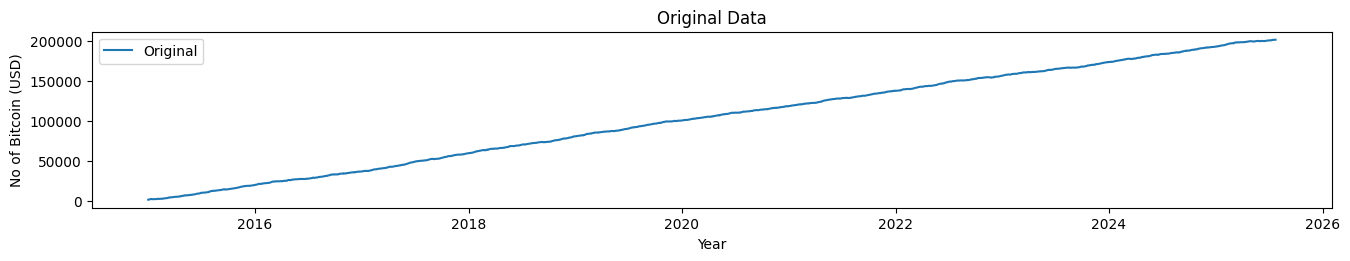

In [6]:
plt.figure(figsize=(16, 16))
plt.subplot(6, 1, 1)
plt.plot(data['Bitcoin (USD)'], label='Original')
plt.legend(loc='best')
plt.title('Original Data')
plt.xlabel('Year')
plt.ylabel('No of Bitcoin (USD)')

Text(0, 0.5, 'Differenced No of Bitcoin (USD)')

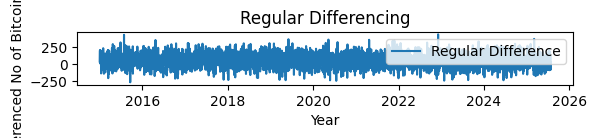

In [7]:
plt.subplot(6, 1, 2)
plt.plot(data['Bitcoin (USD)_diff'], label='Regular Difference')
plt.legend(loc='best')
plt.title('Regular Differencing')
plt.xlabel('Year')
plt.ylabel('Differenced No of Bitcoin (USD)')

Text(0, 0.5, 'Seasonally djusted No of Bitcoin (USD)')

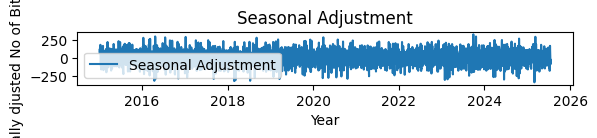

In [8]:
plt.subplot(6, 1, 3)
plt.plot(data['Bitcoin (USD)_sea_diff'], label='Seasonal Adjustment')
plt.legend(loc='best')
plt.title('Seasonal Adjustment')
plt.xlabel('Year')
plt.ylabel('Seasonally djusted No of Bitcoin (USD)')

Text(0, 0.5, 'Log(No of Bitcoin (USD))')

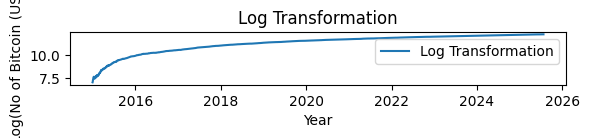

In [9]:
plt.subplot(6, 1, 4)
plt.plot(data['Bitcoin (USD)_log'], label='Log Transformation')
plt.legend(loc='best')
plt.title('Log Transformation')
plt.xlabel('Year')
plt.ylabel('Log(No of Bitcoin (USD))')

<Axes: >

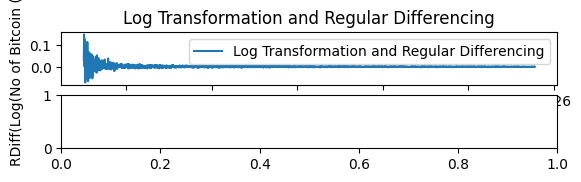

In [10]:
plt.subplot(6, 1, 5)
plt.plot(data['Bitcoin (USD)_log_diff'], label='Log Transformation and Regular Differencing')
plt.legend(loc='best')
plt.title('Log Transformation and Regular Differencing')
plt.xlabel('Year')
plt.ylabel('RDiff(Log(No of Bitcoin (USD)))')
plt.subplot(6, 1, 6)

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(
    data['Bitcoin (USD)_log_diff'].dropna(),
    model='additive',
    period=30
)

data['Bitcoin (USD)_log_seasonal_diff'] = result.resid


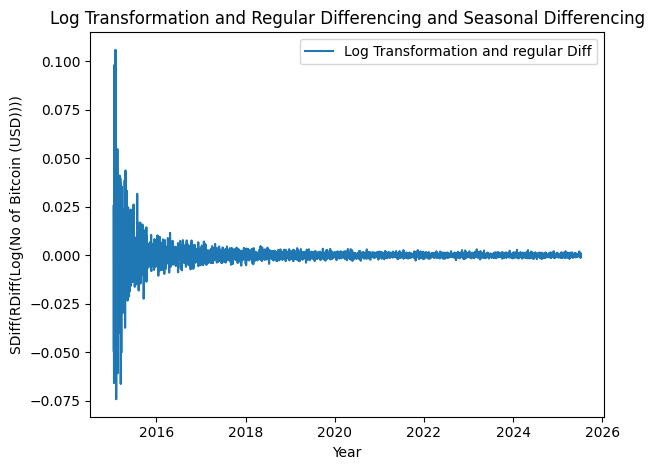

<Axes: xlabel='Date'>

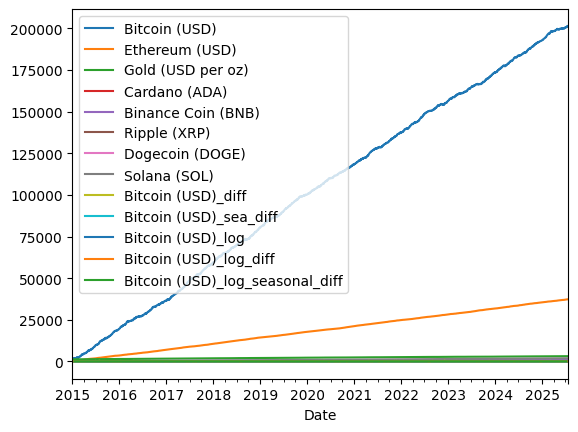

In [14]:
plt.plot(data['Bitcoin (USD)_log_seasonal_diff'], label='Log Transformation and regular Diff')
plt.legend(loc='best')
plt.title('Log Transformation and Regular Differencing and Seasonal Differencing')
plt.xlabel('Year')
plt.ylabel('SDiff(RDiff(Log(No of Bitcoin (USD))))')
plt.tight_layout()
plt.show()

data.plot(kind='line')